In [68]:
import matplotlib.pyplot as plt 
import os 
import glob
import numpy
import pandas
import seaborn as sns
import json
import numpy as np

In [47]:
data_dir = f'{os.getcwd()}/histories/'

In [48]:
print(data_dir)

/home/gob24/gnn-assisted-fl/histories/


In [49]:
def get_res(result_files, filter=False):
    cen_losses = []
    cen_accuracy = []
    dist_losses = []
    for r in result_files:
        print(r)
        with open(r, 'r') as f:
            hist = json.load(f)
            dist_losses.append(hist["losses_distributed"])
            cen_losses.append(hist["losses_centralized"])
            cen_accuracy.append(hist["metrics_centralized"]["accuracy"])

    return (cen_losses, cen_accuracy, dist_losses)

In [50]:
def load_results(module, strategy, cpr):

    file_name = f'hist_*_{module}_strategy_{strategy}_clients_per_round_{cpr}_*.json'
    seeded_results = glob.glob(f'{data_dir}/{file_name}')
    
    f_results = get_res(seeded_results)

    # return f_results
    
    return {
            'cen_losses': f_results[0],
            'cen_accuracy': f_results[1],
            'dist_losses': f_results[2]
            }

In [61]:
sns.set_palette("Set2")

In [91]:

def plot_data(multi_data, ylabel):
    
    for key, data in multi_data.items():
        # print(data)
        data = np.array(data)

        mean = np.mean(data, axis=0)
        std = np.std(data, axis=0)

        x = mean[:, 0]
        y = mean[:, 1]
        plt.plot(x, y, label=key)
        plt.fill_between(x, y - std[:, 1], y + std[:, 1], alpha=0.4)

    plt.legend()
    plt.xlabel('Round')
    plt.ylabel(ylabel)
    plt.show()

In [92]:
all_res = {}
all_res["GCNAvg"] = load_results("single_experiment", "GCNAvg", "10")
all_res["GCNPredAvg"] = load_results("single_experiment", "GCNPredAvg", "10")
all_res["FedAvg"] = load_results("single_experiment", "FedAvg", "10")
all_res["GCNAngleAvg"] = load_results("single_experiment", "GCNAngleAvg", "10")


# print(all_res)
v_cen_loss = {}
v_dist_loss = {}
v_cen_acc = {}
for k,v in all_res.items():
    v_cen_loss[k] = v['cen_losses']
    v_dist_loss[k] = v['dist_losses']
    v_cen_acc[k] = v['cen_accuracy']


/home/gob24/gnn-assisted-fl/histories/hist_1679438645_single_experiment_strategy_GCNAvg_clients_per_round_10_10.json
/home/gob24/gnn-assisted-fl/histories/hist_1679439209_single_experiment_strategy_GCNAvg_clients_per_round_10_42.json
/home/gob24/gnn-assisted-fl/histories/hist_1679439769_single_experiment_strategy_GCNAvg_clients_per_round_10_35.json
/home/gob24/gnn-assisted-fl/histories/hist_1679436928_single_experiment_strategy_GCNPredAvg_clients_per_round_10_10.json
/home/gob24/gnn-assisted-fl/histories/hist_1679437519_single_experiment_strategy_GCNPredAvg_clients_per_round_10_42.json
/home/gob24/gnn-assisted-fl/histories/hist_1679438086_single_experiment_strategy_GCNPredAvg_clients_per_round_10_35.json
/home/gob24/gnn-assisted-fl/histories/hist_1679441433_single_experiment_strategy_FedAvg_clients_per_round_10_35.json
/home/gob24/gnn-assisted-fl/histories/hist_1679440327_single_experiment_strategy_FedAvg_clients_per_round_10_10.json
/home/gob24/gnn-assisted-fl/histories/hist_167944088

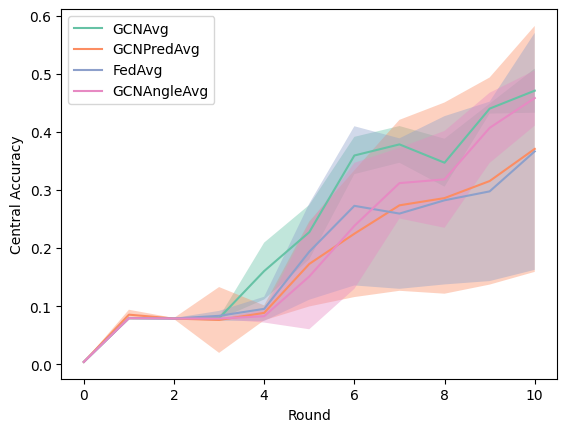

In [93]:
plot_data(v_cen_acc, "Central Accuracy")

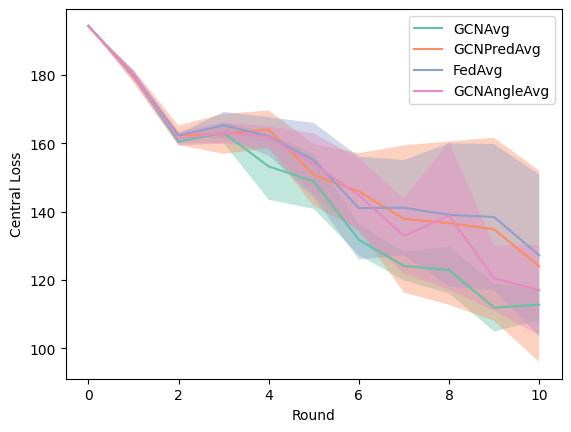

In [94]:
plot_data(v_cen_loss, "Central Loss")

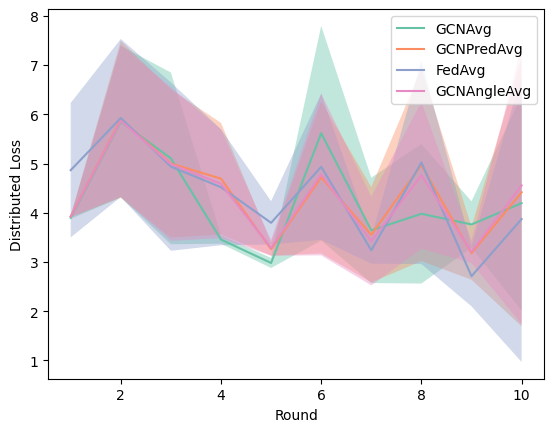

In [95]:
plot_data(v_dist_loss, "Distributed Loss")

In [96]:
all_res = {}
all_res["GCNAvg"] = load_results("lda_run", "GCNAvg", "10")
all_res["GCNPredAvg"] = load_results("lda_run", "GCNPredAvg", "10")
all_res["FedAvg"] = load_results("lda_run", "FedAvg", "10")
all_res["GCNAngleAvg"] = load_results("lda_run", "GCNAngleAvg", "10")


# print(all_res)
v_cen_loss = {}
v_dist_loss = {}
v_cen_acc = {}
for k,v in all_res.items():
    v_cen_loss[k] = v['cen_losses']
    v_dist_loss[k] = v['dist_losses']
    v_cen_acc[k] = v['cen_accuracy']


/home/gob24/gnn-assisted-fl/histories/hist_1679496221_lda_run_strategy_GCNAvg_clients_per_round_10_35.json
/home/gob24/gnn-assisted-fl/histories/hist_1679493535_lda_run_strategy_GCNAvg_clients_per_round_10_10.json
/home/gob24/gnn-assisted-fl/histories/hist_1679494881_lda_run_strategy_GCNAvg_clients_per_round_10_42.json
/home/gob24/gnn-assisted-fl/histories/hist_1679490862_lda_run_strategy_GCNPredAvg_clients_per_round_10_42.json
/home/gob24/gnn-assisted-fl/histories/hist_1679492198_lda_run_strategy_GCNPredAvg_clients_per_round_10_35.json
/home/gob24/gnn-assisted-fl/histories/hist_1679489539_lda_run_strategy_GCNPredAvg_clients_per_round_10_10.json
/home/gob24/gnn-assisted-fl/histories/hist_1679498880_lda_run_strategy_FedAvg_clients_per_round_10_42.json
/home/gob24/gnn-assisted-fl/histories/hist_1679500198_lda_run_strategy_FedAvg_clients_per_round_10_35.json
/home/gob24/gnn-assisted-fl/histories/hist_1679497565_lda_run_strategy_FedAvg_clients_per_round_10_10.json
/home/gob24/gnn-assisted-

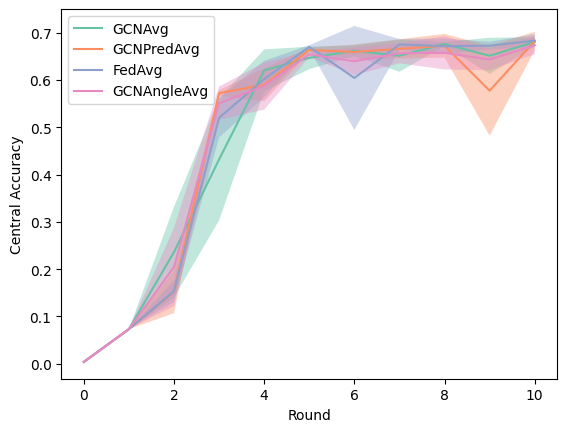

In [97]:
plot_data(v_cen_acc, "Central Accuracy")

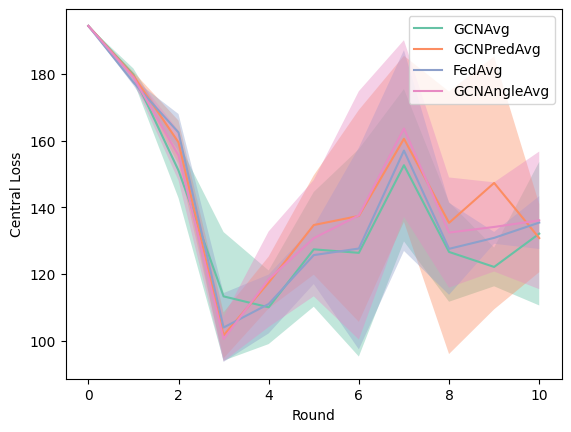

In [98]:
plot_data(v_cen_loss, "Central Loss")

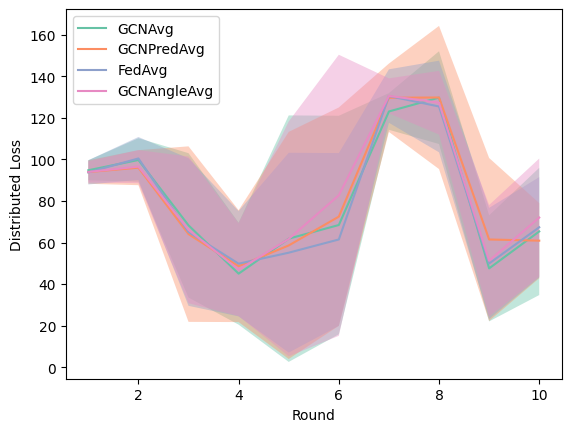

In [99]:
plot_data(v_dist_loss, "Distributed Loss")